In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import joblib


In [13]:
df = pd.read_csv('dados_treino_v2.csv', sep='|')
df.head()

,internacao,MP10,O3,TEMP,UR,DS_CID,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO
0,0,28.620098,31.930049,21.833099,80.276419,AMIGDALITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,0,0,0,1,F
1,0,22.559984,28.459289,21.524707,81.938460,ASMA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M
2,0,23.173989,29.115721,20.771323,87.768694,BRONQUIOLITE AGUDA,0,0,0,1,1,0,0,0,0,M
3,1,29.538983,30.253300,21.908878,79.161412,BRONQUIOLITE AGUDA DEVIDA A VIRUS SINCICIAL RE...,0,0,0,1,1,0,0,0,0,F
4,0,33.311234,26.157899,21.339680,81.960879,BRONQUITE AGUDA NAO ESPECIFICADA,0,0,0,1,0,1,0,0,0,M


In [14]:
df = pd.get_dummies(df, columns=["TP_SEXO", "DS_CID"], dtype='int')
df.head()

,internacao,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,28.620098,31.930049,21.833099,80.276419,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22.559984,28.459289,21.524707,81.938460,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,23.173989,29.115721,20.771323,87.768694,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,29.538983,30.253300,21.908878,79.161412,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,33.311234,26.157899,21.339680,81.960879,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
headers = list(df.columns)[5:]
X = df[headers]
y = df['internacao']
df[headers].head()

,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,ENTRE_5_9_ANOS,ENTRE_10_14_ANOS,ENTRE_15_18_ANOS,TP_SEXO_F,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
colunas_normalizar = ['MP10', 'O3', 'TEMP', 'UR']
X.loc[:, colunas_normalizar] = scaler.fit_transform(X.loc[:, colunas_normalizar])
X[headers].head()


,MP10,O3,TEMP,UR,outono,inverno,primavera,verao,MENOR_1_ANO,ENTRE_1_4_ANOS,...,DS_CID_SIDEROSE,DS_CID_SINUSITE AGUDA,DS_CID_SINUSITE AGUDA NAO ESPECIFICADA,DS_CID_SINUSITE CRONICA,DS_CID_SINUSITE CRONICA NAO ESPECIFICADA,DS_CID_SINUSITE ESFENOIDAL AGUDA,DS_CID_SINUSITE FRONTAL AGUDA,DS_CID_SINUSITE MAXILAR AGUDA,DS_CID_TRANSTORNO RESPIRATORIO NAO ESPECIFICADOS,DS_CID_TRAQUEITE AGUDA
0,0.217744,0.254960,0.688959,0.771206,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.167354,0.225945,0.674581,0.790496,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.172460,0.231433,0.639458,0.858161,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.225385,0.240942,0.692492,0.758266,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.256751,0.206706,0.665955,0.790756,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
logistic_regression= LogisticRegression(max_iter=5000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
# joblib.dump(logistic_regression, "dados_treino_2022.pkl")

<Axes: xlabel='Predicted', ylabel='Actual'>

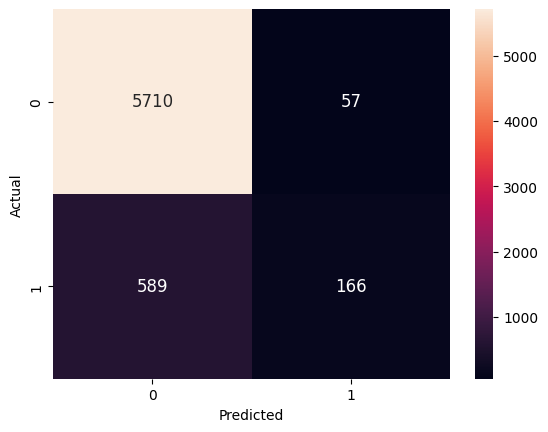

In [24]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, annot_kws={"size": 12}, fmt='d')

In [25]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.900950628641521


In [26]:
recall = metrics.recall_score(y_test, y_pred)
print('Sensitivity (Recall):', recall)

Sensitivity (Recall): 0.21986754966887417


In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print ([tn, fp, fn, tp ])
specificity = tn / (tn+fp)
print ('Specificity: ', specificity)

[5710, 57, 589, 166]
Specificity:  0.9901161782555922


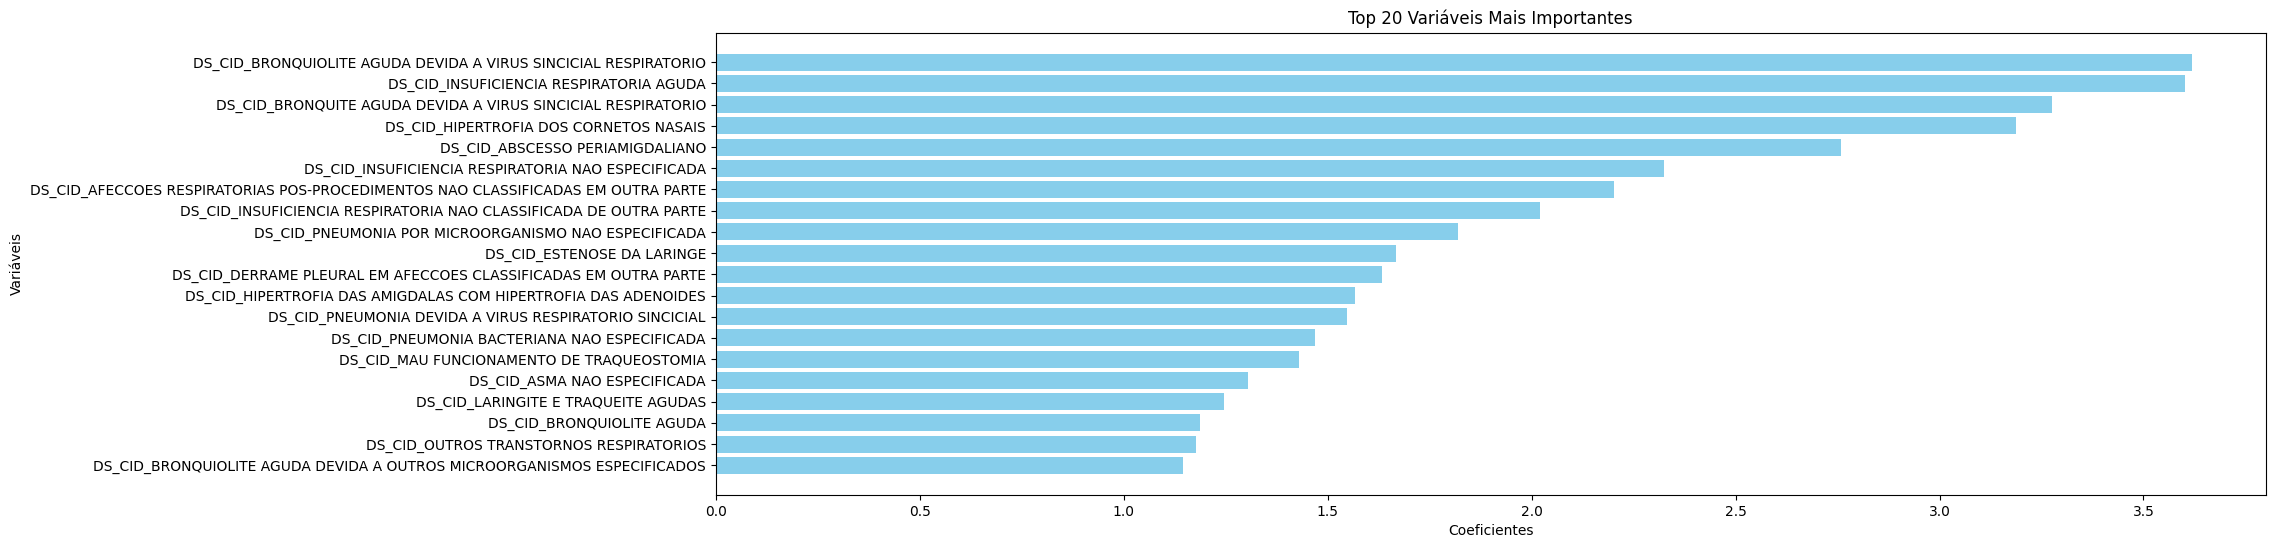

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Obtendo os coeficientes e nomes das variáveis
coeficientes = logistic_regression.coef_[0]
nomes_variaveis = X_train.columns  # Substitua por seus próprios nomes de variáveis

# Criando um índice para classificar os coeficientes
indices_ordenados = np.argsort(coeficientes)

# Selecionando os 10 coeficientes mais importantes
top_10_coeficientes = coeficientes[indices_ordenados][-20:]
top_10_variaveis = nomes_variaveis[indices_ordenados][-20:]

# Criando o gráfico de barras
plt.figure(figsize=(20,6))
plt.barh(top_10_variaveis, top_10_coeficientes, color='skyblue')
plt.xlabel('Coeficientes')
plt.ylabel('Variáveis')
plt.title('Top 20 Variáveis Mais Importantes')
plt.show()
